In [2]:
"""PCA标准化降维"""
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 生成数据（3维，100样本）
X = np.random.rand(100, 3)

# 标准化，把特征缩放到标准正态分布
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# PCA降维（降至2维）
pca = PCA(n_components=2)
Y = pca.fit_transform(X_std)

# 输出主成分信息
print("主成分方向（特征向量）:\n", pca.components_)
print("各主成分的方差（特征值）:", pca.explained_variance_)
print("累计方差贡献率:", pca.explained_variance_ratio_.cumsum())

主成分方向（特征向量）:
 [[-0.51363255 -0.38650808  0.76602422]
 [-0.65110427  0.75702103 -0.05461132]]
各主成分的方差（特征值）: [1.0774528  1.03930283]
累计方差贡献率: [0.35555942 0.69852936]


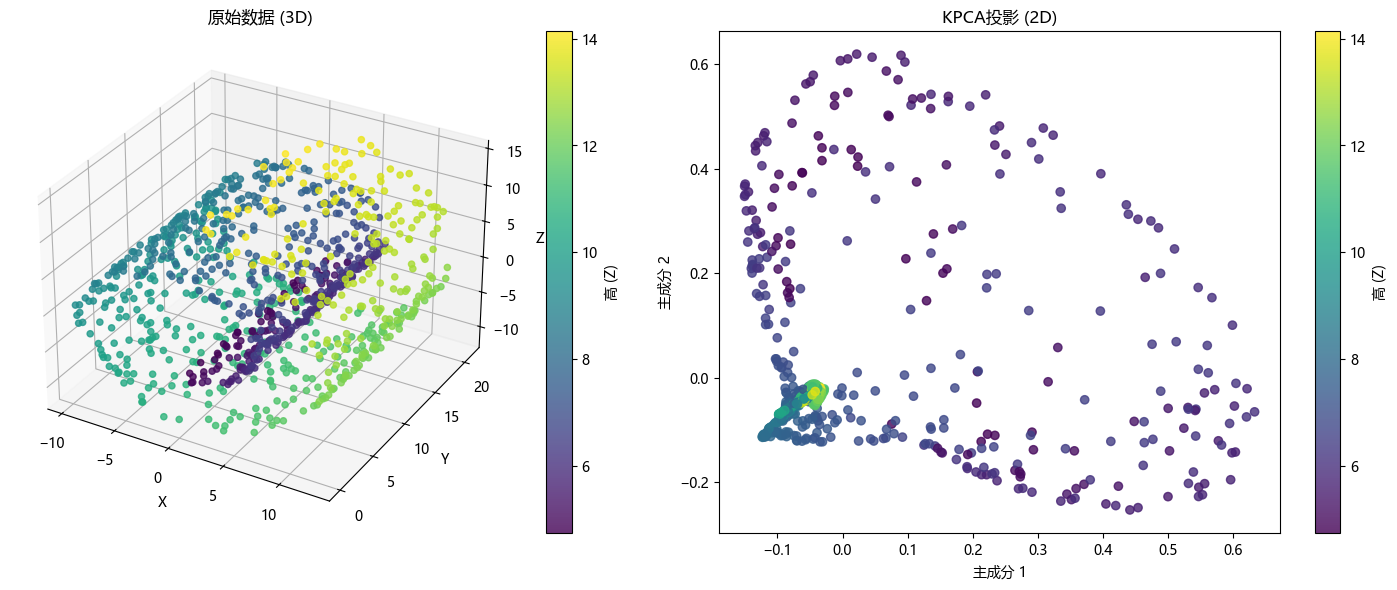

In [3]:
"""核主成分分析KPCA"""
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import KernelPCA

matplotlib.rcParams['font.family'] = 'Microsoft YaHei'

# 生成三维瑞士卷数据集（三维）
X, color = make_swiss_roll(n_samples=1000, noise=0.1, random_state=42)

# 创建画布
fig = plt.figure(figsize=(15, 6))

# ---------- 1. 绘制原始三维数据 ----------
ax1 = fig.add_subplot(121, projection='3d')
sc1 = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap='viridis', alpha=0.8)
ax1.set_title("原始数据 (3D)")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
plt.colorbar(sc1, ax=ax1, label='高 (Z)')

# ---------- 2. 核PCA降维并绘制二维结果 ----------
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1, random_state=42)
X_kpca = kpca.fit_transform(X)

ax2 = fig.add_subplot(122)
sc2 = ax2.scatter(X_kpca[:, 0], X_kpca[:, 1], c=color, cmap='viridis', alpha=0.8)
ax2.set_title("KPCA投影 (2D)")
ax2.set_xlabel("主成分 1")
ax2.set_ylabel("主成分 2")
plt.colorbar(sc2, ax=ax2, label='高 (Z)')

plt.tight_layout()
plt.show()

最大允许的n_components值: 1


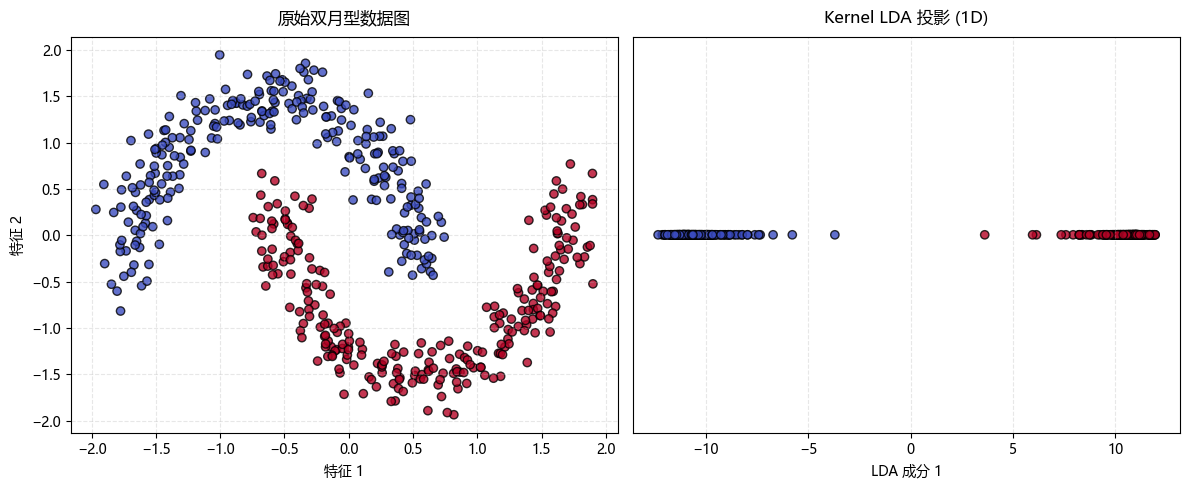

In [4]:
"""核线性判别分析KLDA"""
from sklearn.datasets import make_moons
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import Pipeline

# 生成非线性可分数据（双月形）
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)
X = StandardScaler().fit_transform(X)  # 标准化

# 计算最大允许的n_components
n_classes = len(np.unique(y))
max_components = min(X.shape[1], n_classes - 1)
print(f"最大允许的n_components值: {max_components}")  # 对于二分类问题，这将是1

# 核LDA实现（通过核近似+Nystroem）
kernel_lda = Pipeline([
    ('nystroem', Nystroem(kernel='rbf', gamma=0.1, n_components=100)),  # 核近似
    ('lda', LinearDiscriminantAnalysis(n_components=max_components))    # 使用计算出的最大值
])
X_klda = kernel_lda.fit_transform(X, y)

# 可视化
plt.figure(figsize=(12, 5))

# 原始数据
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.8, edgecolors='k')
plt.title("原始双月型数据图", fontsize=12, pad=10)
plt.xlabel("特征 1", fontsize=10)
plt.ylabel("特征 2", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.3)

# Kernel LDA结果
plt.subplot(1, 2, 2)
if max_components == 1:
    # 如果只能降维到1维，使用柱状图展示
    plt.scatter(X_klda, np.zeros_like(X_klda), c=y, cmap='coolwarm', alpha=0.8, edgecolors='k')
    plt.title("Kernel LDA 投影 (1D)", fontsize=12, pad=10)
    plt.xlabel("LDA 成分 1", fontsize=10)
    plt.yticks([])
else:
    # 如果能降维到2维，使用散点图
    plt.scatter(X_klda[:, 0], X_klda[:, 1], c=y, cmap='coolwarm', alpha=0.8, edgecolors='k')
    plt.title(f"Kernel LDA 投影 ({max_components}D)", fontsize=12, pad=10)
    plt.xlabel("LDA成分 1", fontsize=10)
    plt.ylabel("LDA成分 2", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [5]:
"""流形学习-流式K-means"""
from sklearn.cluster import MiniBatchKMeans

# 模拟数据流（每次生成2048个2D点以满足batch_size要求）
def data_stream():
    while True:
        yield np.random.rand(2048, 2) * np.random.uniform(0.5, 1.5)  # 调整批量大小

# 初始化流式K-Means（设置batch_size>=2048避免内存泄漏）
kmeans = MiniBatchKMeans(n_clusters=3, batch_size=2048, random_state=42)  # 显式设置随机种子

# 在线学习
for i, batch in enumerate(data_stream()):
    kmeans.partial_fit(batch)  # 增量更新
    if i % 10 == 0:
        print(f"Batch {i}, Centers:\n{kmeans.cluster_centers_.round(4)}")  # 保留4位小数
    if i >= 10: break  # 演示运行10个批次（实际应为无限循环）

Batch 0, Centers:
[[0.3032 0.7602]
 [1.0538 1.0628]
 [0.9279 0.3366]]
Batch 10, Centers:
[[0.2701 0.5789]
 [0.9431 1.0025]
 [0.7819 0.2906]]


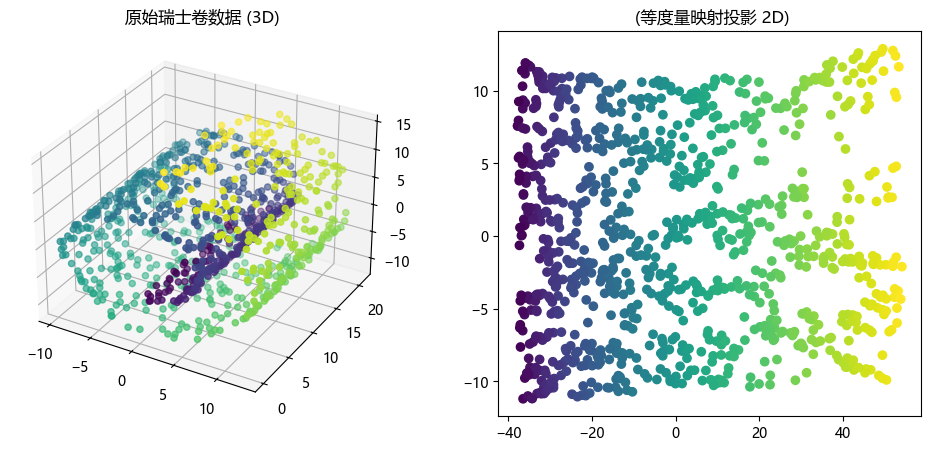

In [6]:
"""流形学习-等度量（等距）映射"""
from sklearn.manifold import Isomap

# 生成瑞士卷数据（3D）
X, color = make_swiss_roll(n_samples=1000, noise=0.1, random_state=42)

# Isomap降维（k=10邻居，降至2D）
isomap = Isomap(n_neighbors=10, n_components=2)
X_isomap = isomap.fit_transform(X)

# 可视化
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap='viridis')
ax1.set_title("原始瑞士卷数据 (3D)")

ax2 = fig.add_subplot(122)
ax2.scatter(X_isomap[:, 0], X_isomap[:, 1], c=color, cmap='viridis')
ax2.set_title(" (等度量映射投影 2D)")
plt.show()

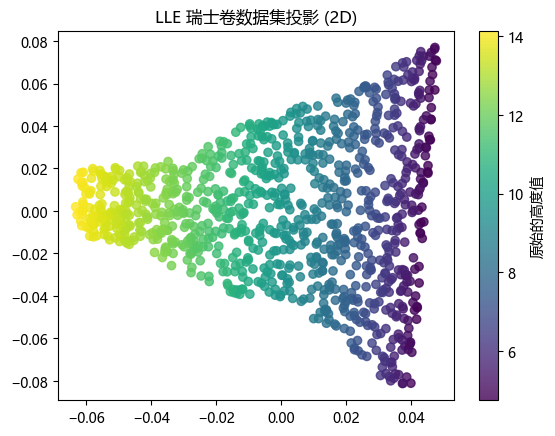

In [7]:
"""局部线性嵌入（LLE）"""
from sklearn.manifold import LocallyLinearEmbedding

# 生成瑞士卷数据（3D）
X, color = make_swiss_roll(n_samples=1000, noise=0.1, random_state=42)

# LLE降维（n_neighbors=12，降至2D）
lle = LocallyLinearEmbedding(n_neighbors=12, n_components=2, random_state=42)
X_lle = lle.fit_transform(X)

# 可视化
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap='viridis', alpha=0.8)
plt.title("LLE 瑞士卷数据集投影 (2D)")
plt.colorbar(label='原始的高度值')
plt.show()

In [8]:
"""度量学习"""
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from metric_learn import LMNN
import warnings

# 过滤未来警告（有些警告不影响运行，但是不好看）
warnings.filterwarnings("ignore", category=FutureWarning)

# 加载鸢尾花数据集并划分训练测试集
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建包含标准化和LMNN的管道
pipeline = make_pipeline(
    StandardScaler(),  # 建议先标准化数据
    LMNN(k=5, learn_rate=1e-3)  # 移除了n_chunks参数
)

# 训练管道
pipeline.fit(X_train, y_train)

# 转换数据
X_train_transformed = pipeline.transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# 使用KNN分类（在新空间中）
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_transformed, y_train)

# 评估模型
train_accuracy = knn.score(X_train_transformed, y_train)
test_accuracy = knn.score(X_test_transformed, y_test)

print(f"训练集准确率: {train_accuracy:.2f}")
print(f"测试集准确率: {test_accuracy:.2f}")

训练集准确率: 0.97
测试集准确率: 1.00
